In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the dataset
music_data = pd.read_csv('music data.csv')
genre_data = pd.read_csv("data_by_genres.csv")
data_w = pd.read_csv('data_w_genres.csv')
data_year = pd.read_csv("data_by_year.csv")


In [4]:
print(music_data.info())
print(genre_data.info())
print(data_w.info())
print(data_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Check basic info and head of each dataset
print("Music Data Info:")
print(music_data.info())

Music Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  rel

In [6]:
print("\nGenre Data Info:")
print(genre_data.info)



Genre Data Info:
<bound method DataFrame.info of       mode                  genres  acousticness  danceability   duration_ms  \
0        1  21st century classical      0.979333      0.162883  1.602977e+05   
1        1                   432hz      0.494780      0.299333  1.048887e+06   
2        1                   8-bit      0.762000      0.712000  1.151770e+05   
3        1                      []      0.651417      0.529093  2.328809e+05   
4        1              a cappella      0.676557      0.538961  1.906285e+05   
...    ...                     ...           ...           ...           ...   
2968     1                    zolo      0.222625      0.547082  2.580991e+05   
2969     0                 zouglou      0.161000      0.863000  2.063200e+05   
2970     1                    zouk      0.263261      0.748889  3.060728e+05   
2971     0            zurich indie      0.993000      0.705667  1.984173e+05   
2972     1                  zydeco      0.421038      0.629409  1.7167

In [7]:
print("\nData with Genres Info:")
print(data_w.info())

print("\nData by Year Info:")
print(data_year.info())


Data with Genres Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), 

# Step 2: Data Cleaning and Preprocessing
Handling Missing Values

In [8]:
# Check for missing values
print("Missing values in music_data:")
print(music_data.isnull().sum())



Missing values in music_data:
valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64


In [9]:
# Example: Convert 'release_date' to datetime format in music_data
music_data['release_date'] = pd.to_datetime(music_data['release_date'])

# Step 3: Exploratory Data Analysis (EDA)
Basic Statistics and Visualizatio

In [10]:
# Summary statistics
print("Summary statistics of numeric columns in music_data:")
print(music_data.describe())

Summary statistics of numeric columns in music_data:
             valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min    5.108000e+03       0.000000       

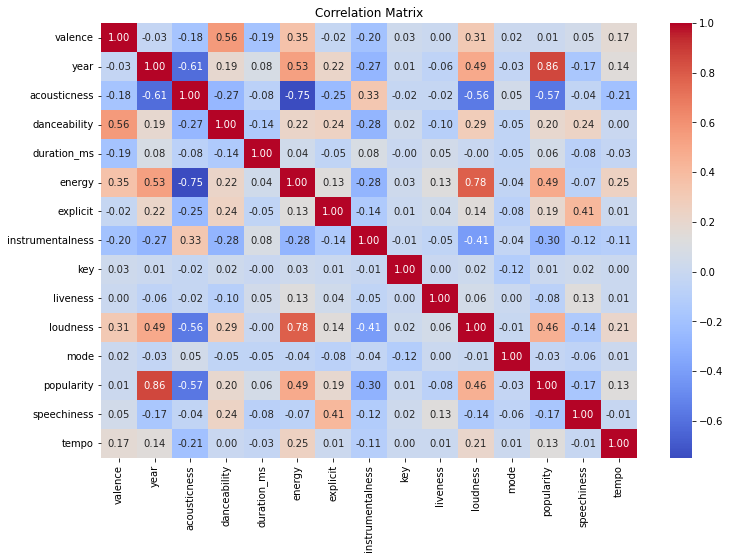

In [11]:
# Correlation matrix
corr_matrix = music_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

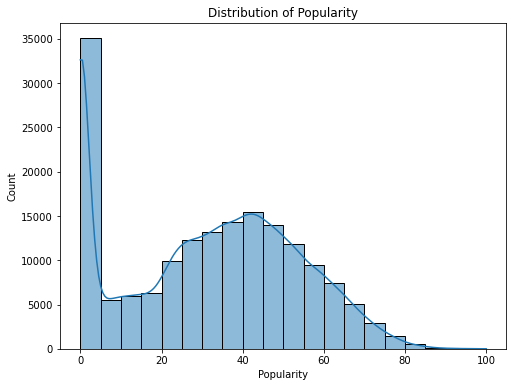

In [12]:
# Distribution of 'popularity'
plt.figure(figsize=(8, 6))
sns.histplot(music_data['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Step 4: Feature Engineering

In [13]:
# Example: Extracting year, month, day from 'release_date'
music_data['release_year'] = music_data['release_date'].dt.year
music_data['release_month'] = music_data['release_date'].dt.month
music_data['release_day'] = music_data['release_date'].dt.day


In [14]:
# Define features and target variable
# Initialize and fit model (example: Random Forest)
from sklearn.preprocessing import StandardScaler
features = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo']
X = music_data[features]
y = music_data['popularity']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Example: Using a smaller subset for initial testing
X_train_scaled_subset = X_train_scaled[:5000]  # Adjust size as needed
y_train_subset = y_train[:5000]

# Initialize and fit model with reduced data
rf_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5)
rf_model.fit(X_train_scaled_subset, y_train_subset)


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [17]:

# Step 5: Predict on test set to evaluate model performance
y_pred = rf_model.predict(X_test_scaled)

In [18]:
# Example: Print accuracy and other metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.17450411649233835

Confusion Matrix:
[[5406    8    0 ...    0    0    0]
 [ 494   36    0 ...    0    0    0]
 [ 293    5    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.95      0.50      5670
           1       0.69      0.06      0.12       564
           2       0.00      0.00      0.00       337
           3       0.00      0.00      0.00       295
           4       0.00      0.00      0.00       237
           5       0.00      0.00      0.00       200
           6       0.00      0.00      0.00       205
           7       0.00      0.00      0.00       222
           8       0.00      0.00      0.00       242
           9       0.00      0.00      0.00       240
          10       0.00      0.00      0.00       246
          11       0.00      0.00      0.00       

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
